In [1]:
from skimage import data
from skimage.filters import unsharp_mask
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tkinter import filedialog
import tkinter as tk

/Users/harshvardhantiwari/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def select_image():
    root = tk.Tk()
    root.withdraw()  # Hide the main window
    file_path = filedialog.askopenfilename()
    return file_path

In [3]:
def convert_to_grayscale(image_path):
    # Load the image
    image = cv2.imread(image_path)
    
    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return grayscale_image

# image_path = r'C:\Users\htiwary\Documents\DNN Image\RXN_RA_122_P24_PERI2_17-02-18-65.tif'
image_path = select_image()
image = convert_to_grayscale(image_path)

2024-12-19 15:00:12.907 python[69092:3192225] +[IMKClient subclass]: chose IMKClient_Legacy
2024-12-19 15:00:14.155 python[69092:3192225] The class 'NSOpenPanel' overrides the method identifier.  This method is implemented by class 'NSWindow'


### Method 1 to sharpen the image

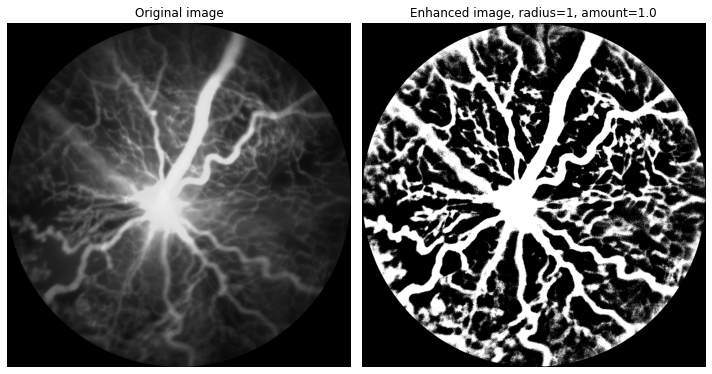

In [6]:
result_1 = unsharp_mask(image, radius=30, amount=35) # (R=30 , A=35) for OIR

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

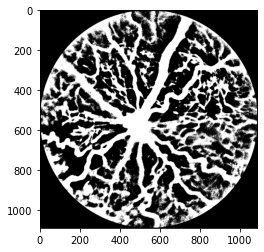

In [9]:
bin_img = result_1 > 0.15

plt.imshow(bin_img, cmap=plt.cm.gray);

In [10]:
def compute_avascularity_percent(image_arr):
    vas = image_arr.sum()
    radius = image_arr.shape[0] // 2 
    total_area = np.pi * radius * radius
    return (1 - vas / total_area) * 100
    
avascularity = compute_avascularity_percent(bin_img)
print("Avascularity= {0:.2f}%".format(avascularity))

Avascularity= 54.13%
